<a href="https://colab.research.google.com/github/koopatroopa787/Google-colab/blob/main/Stable%20Diffusion%20implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STABLE DIFFUSION IMPLEMENTATION :**

*  This Colab notebook implements the stable diffusion model for image generation. Below, you'll find the code for defining the model architecture,  and generating new images using the trained model.
*   First and most important task will be to load all the libraries and loading stable diffusion pipeline into colab **(i recommend changing the runtype to T4 GPU if u are using colab free tier as it helps in boosting and using the model by a lot)**.

---


1.   import the following as u will need them later on
2.   Make changes as per ur need, this is a basic implementation and focuses on the major parts of stable diffusion, feel free to exoeriment wih it






In [ ]:
#checking the runtime to make sure the GPU is connected
!nvidia-smi

Wed Feb  7 13:24:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#loading necessary libraries
#loading extra libraries for extra speed
#!pip install diffusers==0.11.1
#!pip install transformers scipy ftfy accelerate
!pip install --quiet git+https://github.com/huggingface/diffusers.git@d420d71398d9c5a8d9a5f95ba2bdb6fe3d8ae31f
!pip install --quiet ipython-autotime
!pip install --quiet transformers==4.34.1 accelerate==0.24.0 safetensors==0.4.0
!pip install --quiet ipyplot
!pip install gradio
%load_ext autotime

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.8/306.8 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━

**LOGGING INTO HUGGING FACE :**

it's not the important part but its useful and futureproof too incase they make it necessary to do it (good for loading private reops and models, can be used for loading checkpoints).

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

time: 182 ms (started: 2024-02-07 13:25:46 +00:00)


# text to image model loading :



*   pay close attention to text prompts given, it plays a big role in image generation, better prompts can generate better images
*   there are other scales that u can play with parameters like guidance scale, seed, adding samplers, generating more images per prompt etc etc. depending on use case



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]


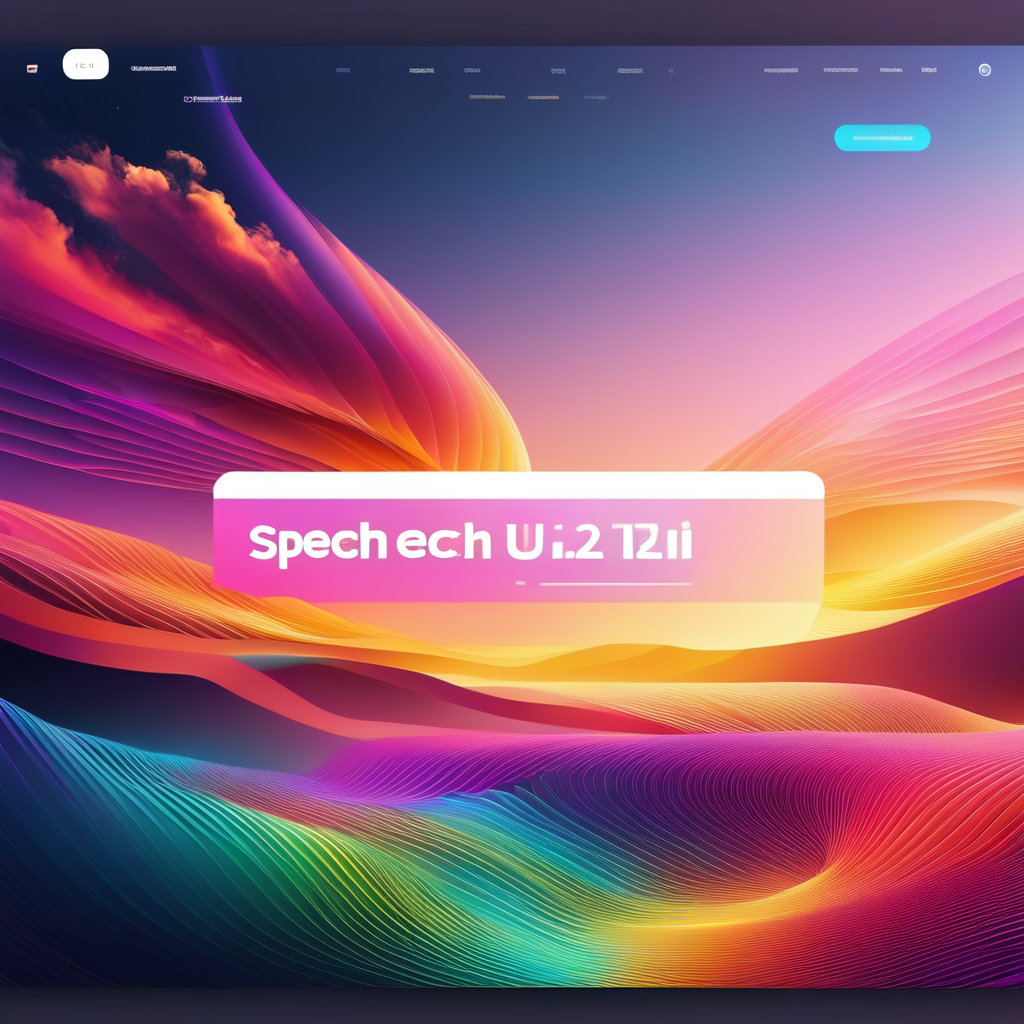


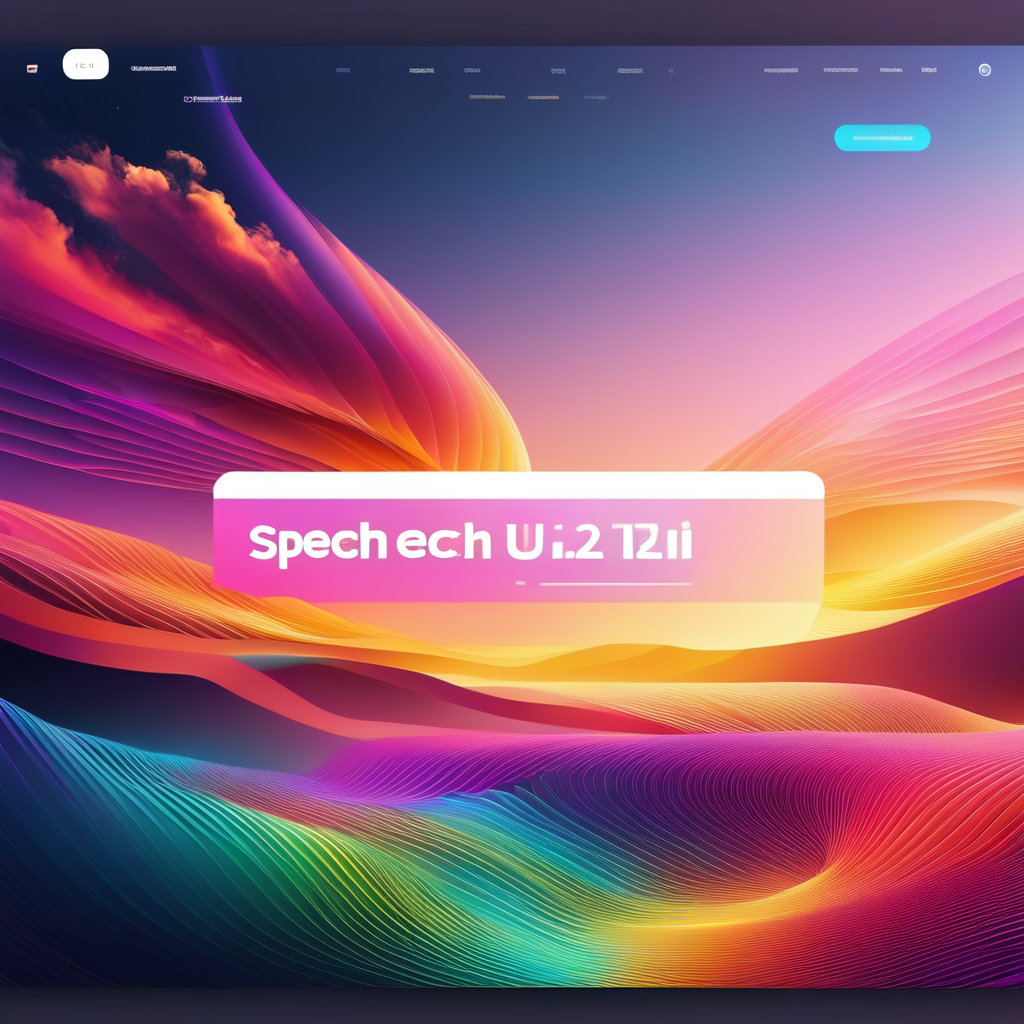

time: 1min 26s (started: 2024-02-07 14:11:18 +00:00)


In [ ]:
#code

from diffusers import StableDiffusionXLPipeline
import torch
import ipyplot
import gradio as gr

pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")


prompt = "generate me  a UI image of Speech summerization website, Striking image, 8K, Desktop background, Immensely sharp."
neg_prompt = "ugly, poorly Rendered face, low resolution, poorly drawn feet, poorly drawn face, out of frame, extra limbs, disfigured, deformed, body out of frame, blurry, bad composition, blurred, watermark, grainy, signature, cut off, mutation"

image = pipe(guidance_scale = 12,num_inference_steps= 65,num_images_per_prompt= 2,prompt=prompt, negative_prompt=neg_prompt).images[0]

image.save("test.jpg")

ipyplot.plot_images([image],img_width=400)

# RESULTS :



*   it requires around 10 GB of vram to generate one image while using a T4 GPU
*   Dont try generating more than 2 images per prompt, GPU utilisation will go out of bounds and ur colab envoirment will crash

*   images generated are detailed and can be downloaded and saved in your system if u need
*   experimenting with parameters will help u generate better images at less resources



